## Part 1: Analyzing Professor Wirfs-Brock's location data

Import the libraries

In [1]:
import pandas as pd
import numpy as np

Read the dataset to dataframe

In [2]:
df = pd.read_csv("prof_wb_location_selection.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,lat,lon,timestamp
0,909677,909677,39.723636,-105.238963,2022-03-09 00:16:38.646000+00:00
1,909678,909678,39.723636,-105.238963,2022-03-09 00:52:39.544000+00:00
2,909679,909679,39.723630,-105.238979,2022-03-09 01:11:38.079000+00:00
3,909680,909680,39.723639,-105.238979,2022-03-09 01:11:56.416000+00:00
4,909681,909681,39.723639,-105.238979,2022-03-09 01:47:57.004000+00:00
...,...,...,...,...,...
1371,911048,911048,46.072694,-118.328500,2022-03-11 23:19:03.306000+00:00
1372,911049,911049,46.072696,-118.328501,2022-03-11 23:27:48.250000+00:00
1373,911050,911050,46.072696,-118.328501,2022-03-11 23:34:09.165000+00:00
1374,911051,911051,46.072695,-118.328503,2022-03-11 23:40:03.242000+00:00


1. Pick a location in Walla Walla -- it can be on the Whitman campus, but it doesn't have to be -- that is NOT  Olin Hall. Find the lat/lon of this location.

I chose the Penrose library location

In [4]:
lat = 46.07221184961475
lon = -118.32966241534379

2. Using the haversine formula, calculate how far Professor Wirfs-Brock was from this location for each data point.

In [5]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [6]:
df['distance'] = haversine_np(df['lon'],df['lat'], -118.32966241534379, 46.07221184961475)

In [7]:
df

,Unnamed: 0.1,Unnamed: 0,lat,lon,timestamp,distance
0,909677,909677,39.723636,-105.238963,2022-03-09 00:16:38.646000+00:00,1275.498330
1,909678,909678,39.723636,-105.238963,2022-03-09 00:52:39.544000+00:00,1275.498330
2,909679,909679,39.723630,-105.238979,2022-03-09 01:11:38.079000+00:00,1275.497605
3,909680,909680,39.723639,-105.238979,2022-03-09 01:11:56.416000+00:00,1275.496998
4,909681,909681,39.723639,-105.238979,2022-03-09 01:47:57.004000+00:00,1275.496998
...,...,...,...,...,...,...
1371,911048,911048,46.072694,-118.328500,2022-03-11 23:19:03.306000+00:00,0.104413
1372,911049,911049,46.072696,-118.328501,2022-03-11 23:27:48.250000+00:00,0.104479
1373,911050,911050,46.072696,-118.328501,2022-03-11 23:34:09.165000+00:00,0.104479
1374,911051,911051,46.072695,-118.328503,2022-03-11 23:40:03.242000+00:00,0.104225


3. Answer: What is the closest Professor Wirfs-Brock came to this location? At what timestamp(s) did this occur?

In [8]:
closest = df["distance"].min()
timestamp1 = df[df["distance"] == closest]["timestamp"]

In [9]:
print(f"The closest Professor Wirfs-Brock came to this location is {closest}")
print(f"The timestamp when that happens is {timestamp1}")

The closest Professor Wirfs-Brock came to this location is 0.03464643599242683
The timestamp when that happens is 1081    2022-03-10 23:41:35.035000+00:00
1082    2022-03-10 23:46:35.568000+00:00
Name: timestamp, dtype: object


4. Answer: What was the furthest Professor Wirfs-Brock was from this location? At what timestamp(s) did this occur? And where was Professor Wirfs-Brock?

In [10]:
furthest = df["distance"].max()
timestamp2 = df[df["distance"] == furthest]["timestamp"]

In [11]:
print(f"The closest Professor Wirfs-Brock came to this location is {furthest}")
print(f"The timestamp when that happens is {timestamp2}")

The closest Professor Wirfs-Brock came to this location is 1305.6471166039573
The timestamp when that happens is 116    2022-03-09 12:34:12.029000+00:00
Name: timestamp, dtype: object


5. Make a map of Professor Wirfs-Brock's location using Observable. (Tip: Take a look at the activity we did in class.)

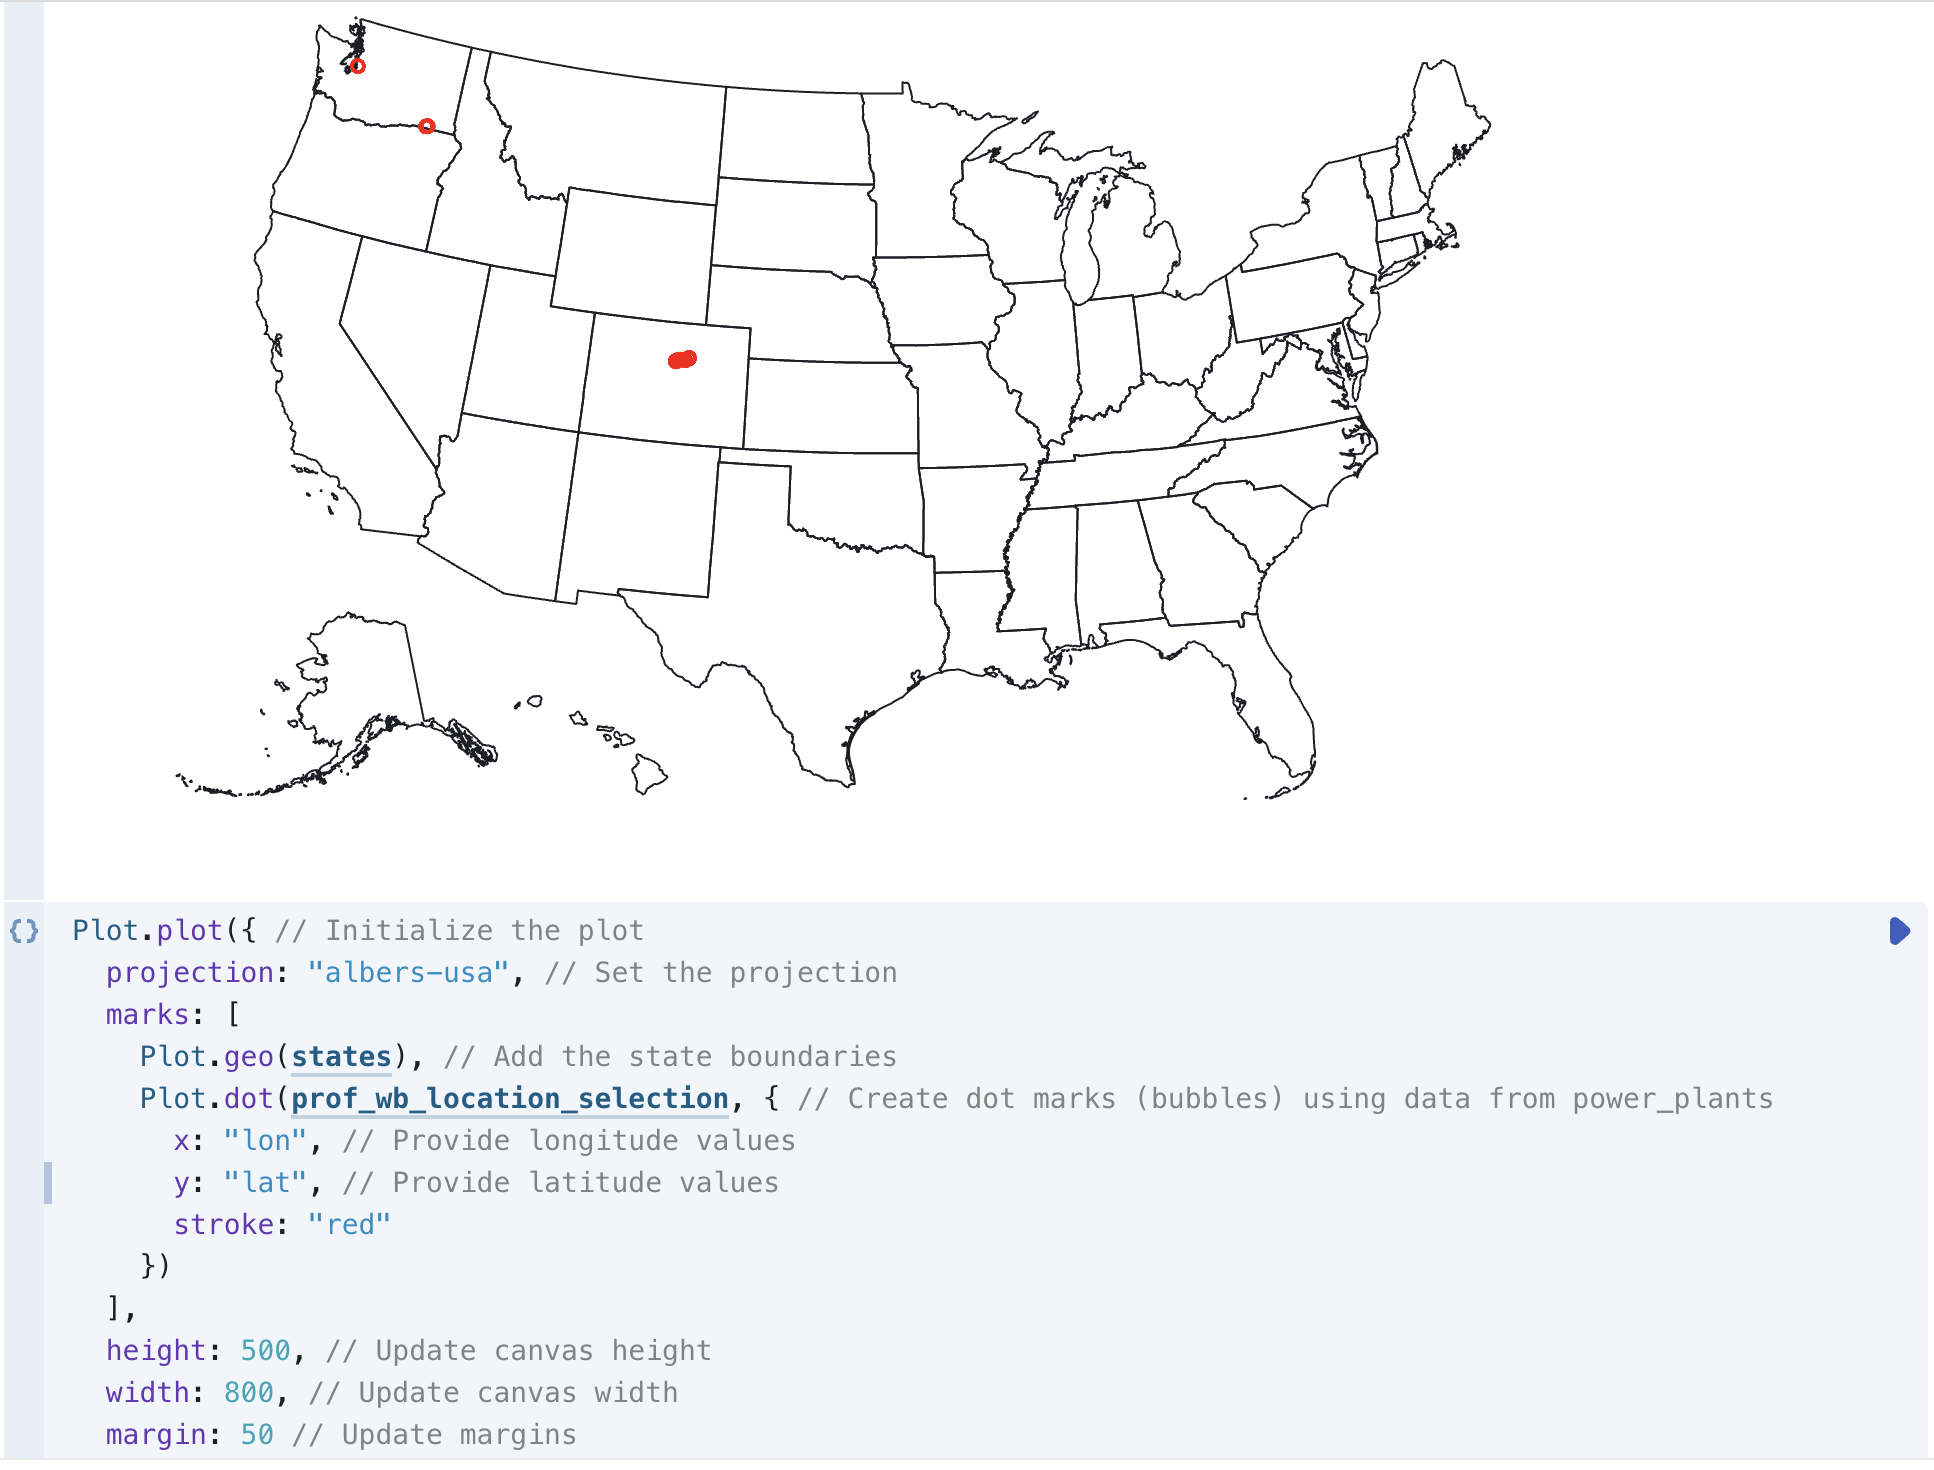

6. Come up with at least one interesting observation/insight about Professor Wirfs-Brock's movements based on this location data.

Looking at the red dots, it seems that Professor Wirfs-Brock visited Colorado and Washington State in March 2022.
If I remember correctly, Professor Wirfs-Brocks has mentioned her interview with Whitman during that time so I'm guessing she flied from Colorado to Seattle and then from Seattle to Walla Walla.

### Challenge

I tried to access the Google Map location history in both my Whitman email and my personal email but surprisingly, there's no data history. This is probably because of they way I set up my Google Map to not record my location

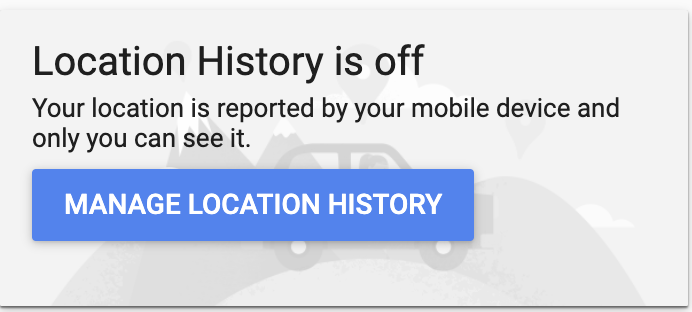

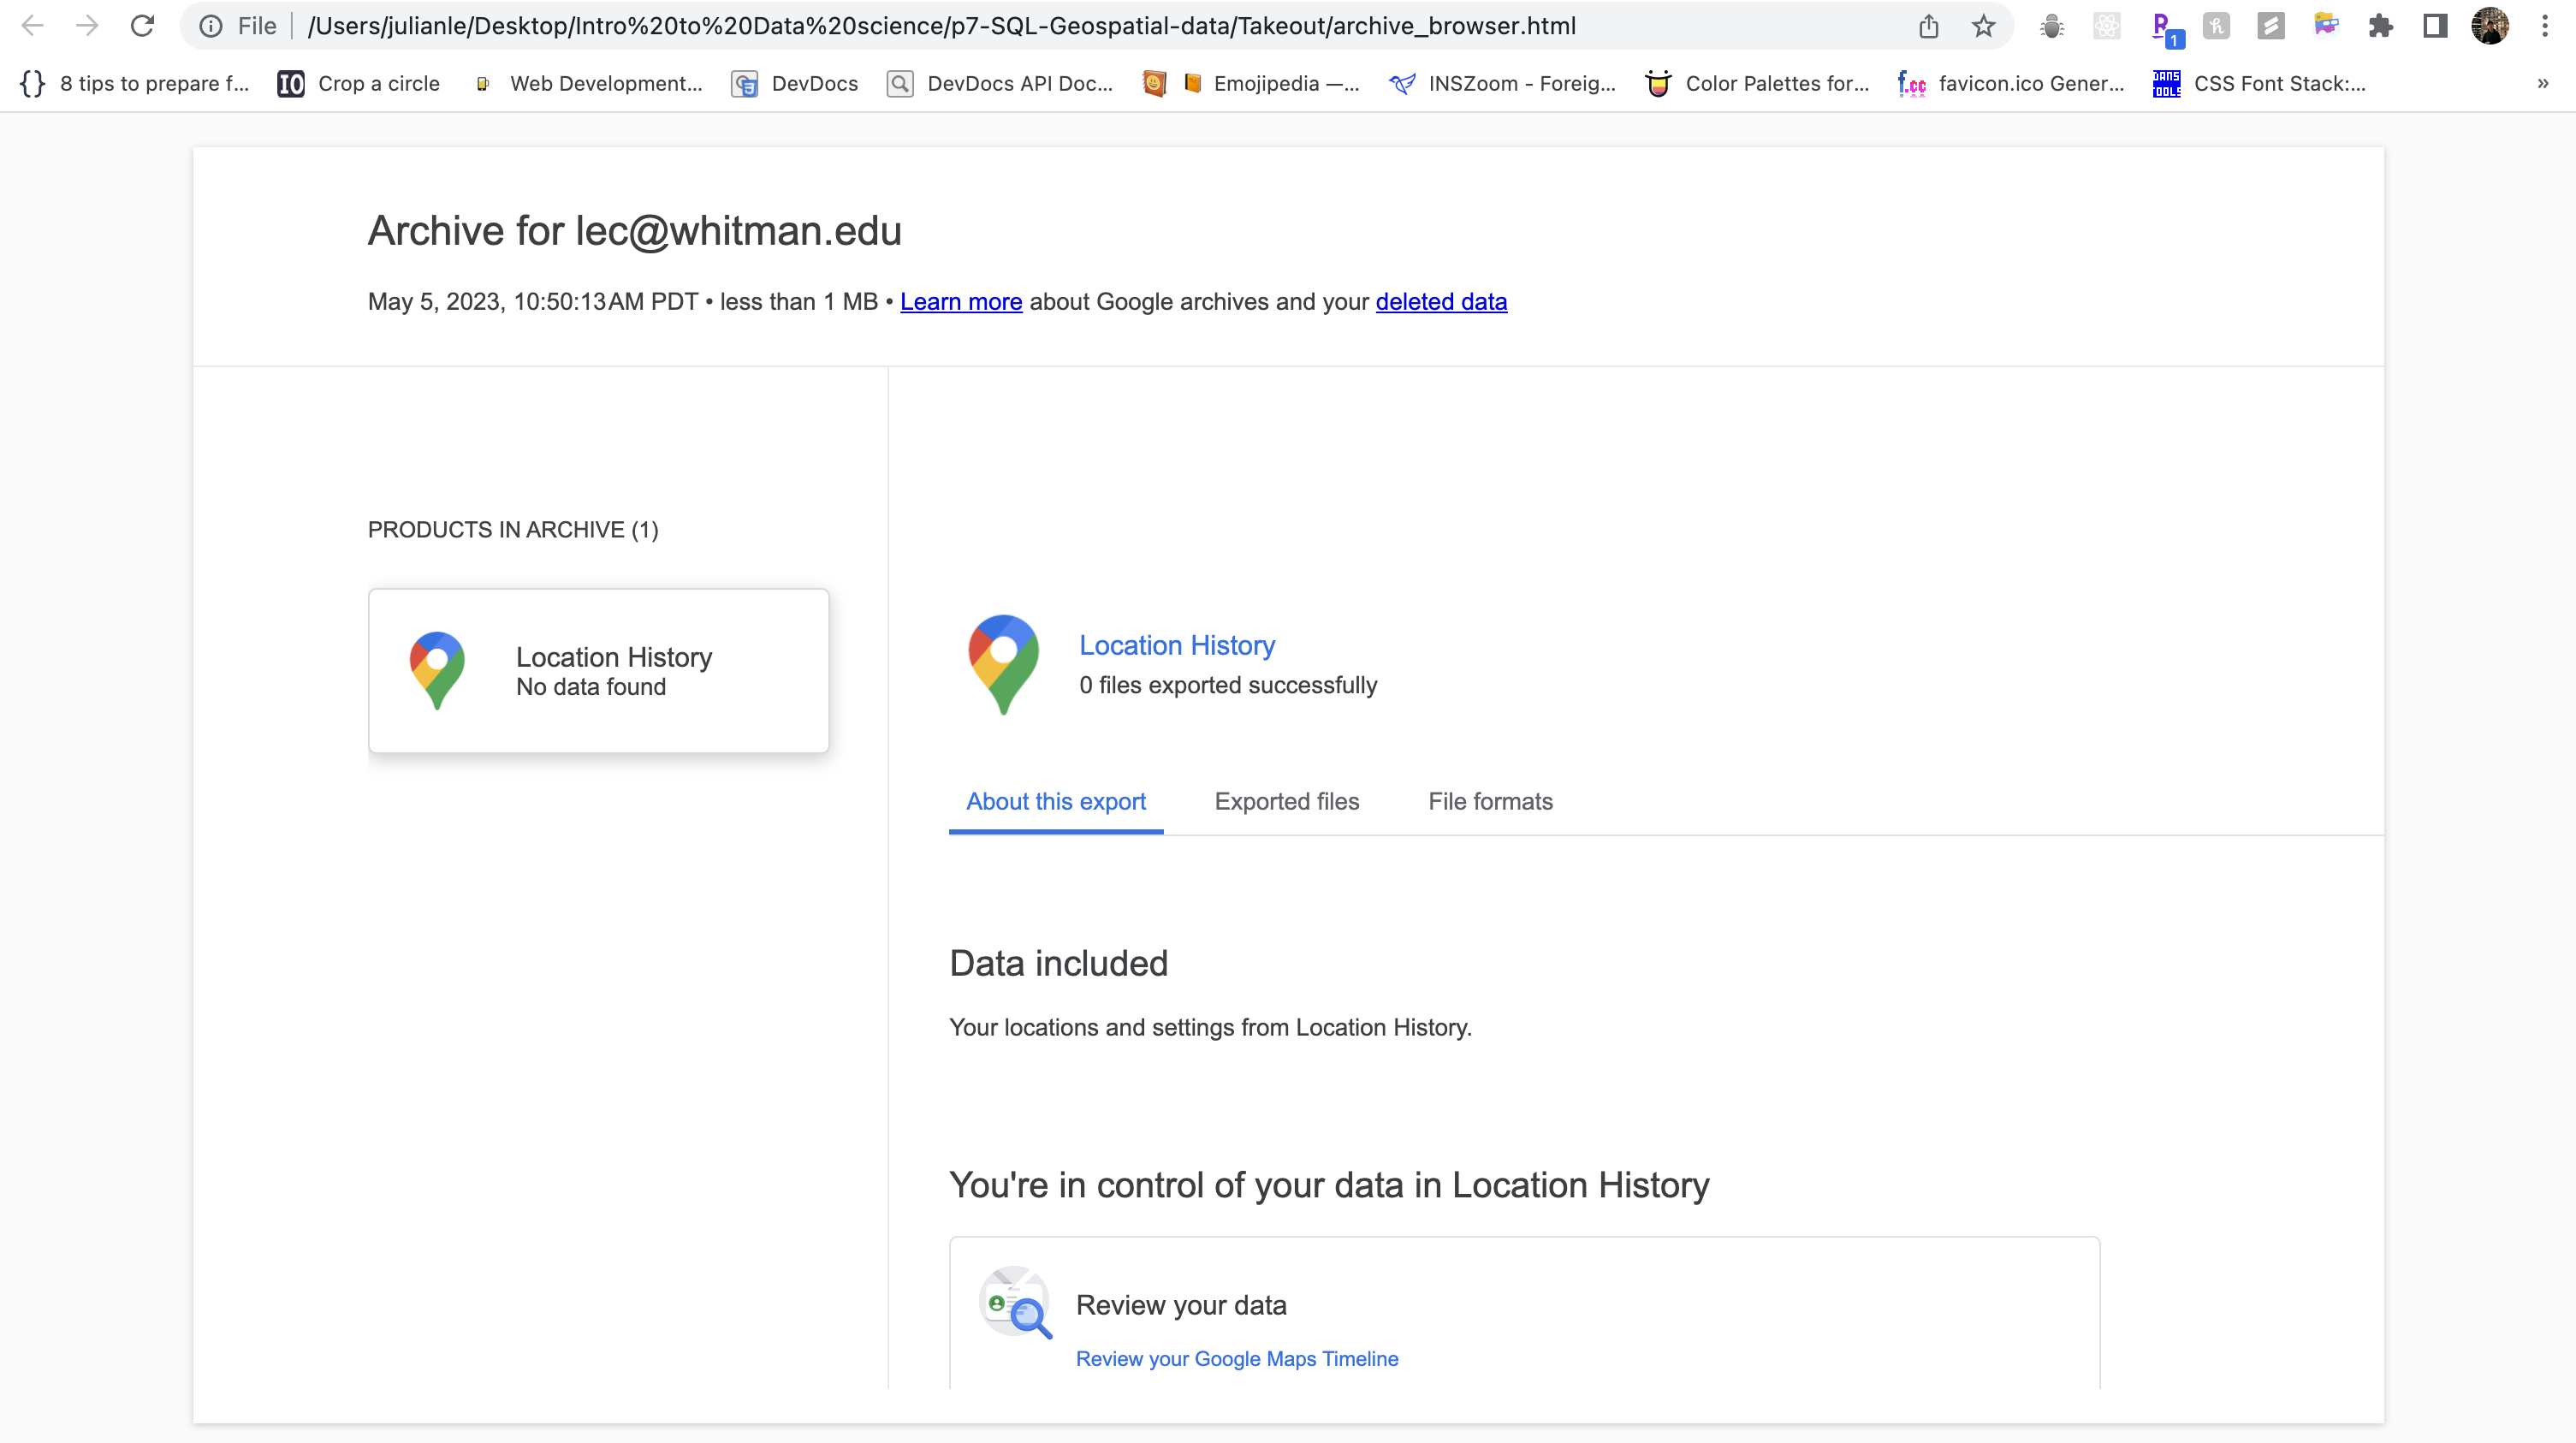

I have also asked a few of my friends for the Google Map dataset but despite my efforts of trying to get the data, all of people I asked also dont have the dataset available as they didn't allow the Google Map to track them

## Part 2: More SQL Baseball Data

1. Start by visiting the Retrosheet site and perusing what is available in "Data Downloads" and elsewhere on this site. Spend some time trying to understand the data and how it is organized.

2. Find and download at least 3 interesting data files that you might download as use as tables to join together in a database. Note: To do this, remember that there needs to be a key/unique identifier that matches between tables! It is your task to figure out how to do this.

- The data that I downloaded Schedules, Transations, and Ejections

3. Create a new BigQuery project and populate it with at least 3 data files you got from Retrosheet. (You are encouraged to use more!)

- Since the data file that I downloaded does not have the headings, I needed to add it and modify a bit by adding the first row as the list of headings to the txt file

4. Write at least three queries in SQL that tell you something interesting. At least one fo these queries should join data from multiple tables.

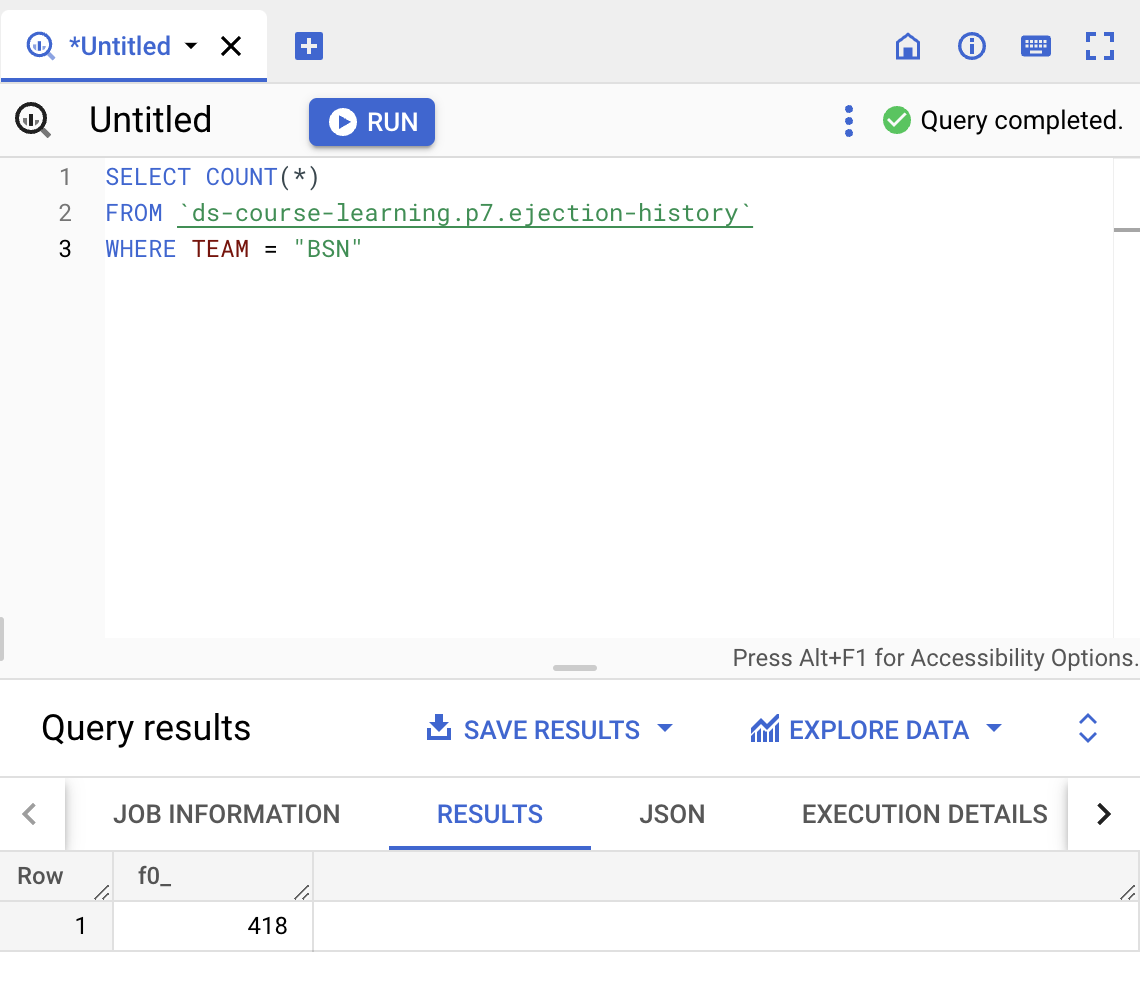

- There are 418 people who got ejected from the team BSN

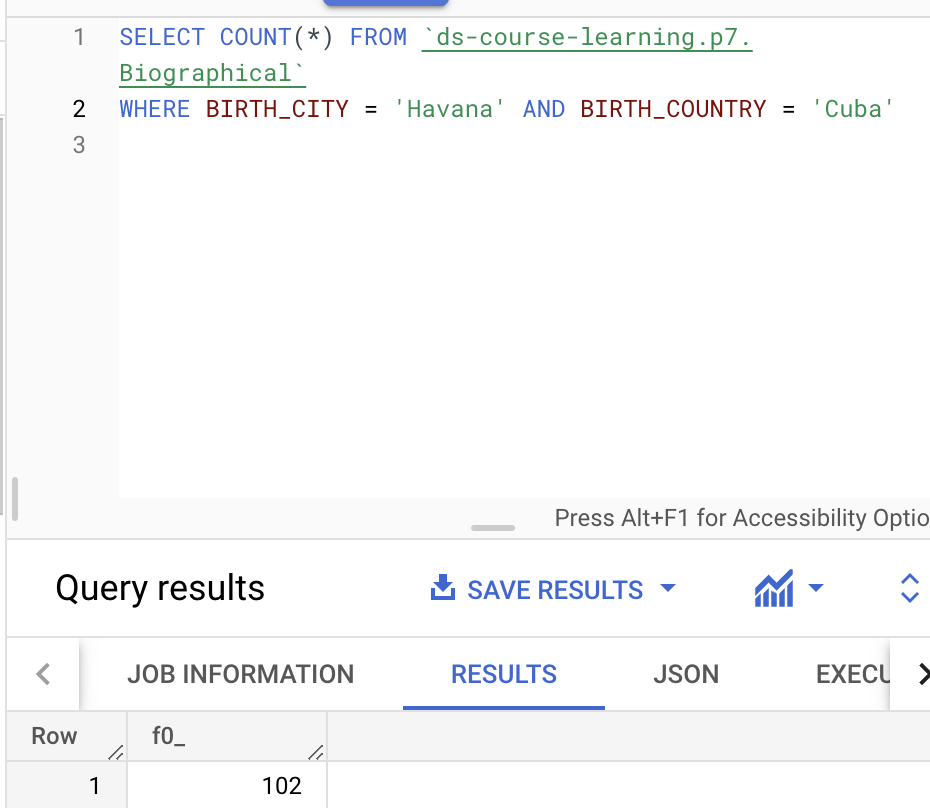

- There are 102 people who are from Havana, Cuba

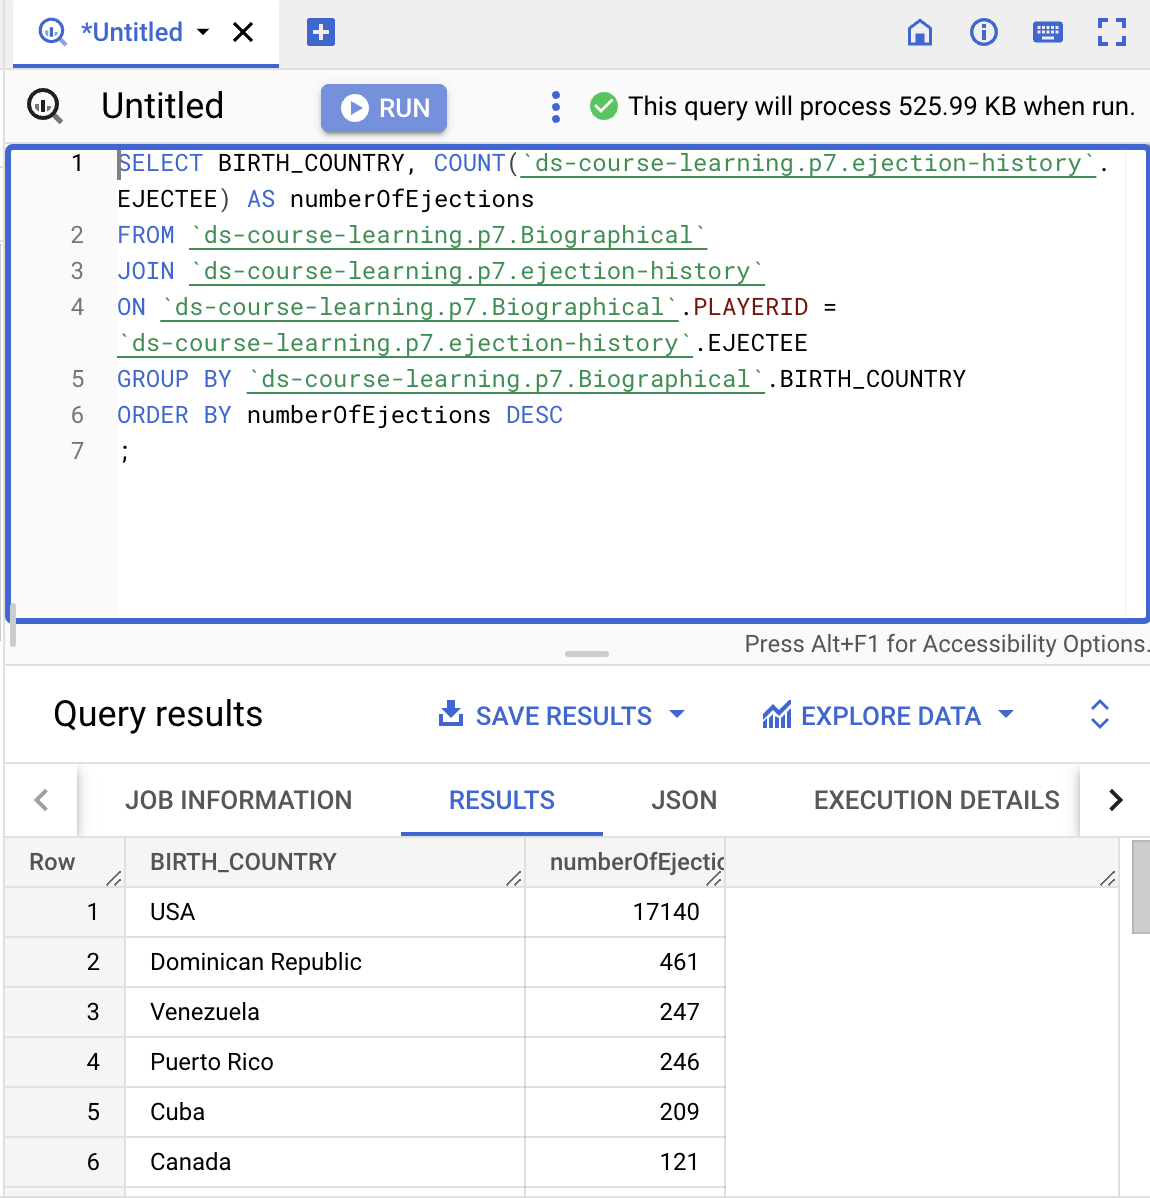

- I joined the Biographical and the ejection history table onthe player id. The goal is to see which country has the most number of players who got ejected. From my query, I see that USA has the most ejections and the number turns out to be around 17000.

#### Challenge

1, Get to know a little bit about Steampipe by exploring the project's website. Read through the documentation. to help figure out how to get started.

I tried to install the Steampipe on my macbook but it's unsuccessful

For now, I will update the latest version later once I can access to the lab

**Update**

Edit: I tried the computer in the lab and it the Steampipe works. I tried the AWS plugin https://hub.steampipe.io/plugins/turbot/aws and played around with it but got a few errors regarding credentials when running the command on the terminal (i'm guessing i need to make an account). If I have more time, I would love to continue to debug and finish the rest of the challenge.